In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import io
import sys
from PIL import Image


import base64
import csv
import numpy as np
from tqdm import tqdm
import json

In [2]:
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)   

In [3]:
dir_path = os.path.abspath('')
os.chdir(dir_path)

In [4]:
with open('./data/caption_datasets/dataset_flickr30k.json') as f:
    data = json.load(f)


0it [00:00, ?it/s]c:\users\alixa\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


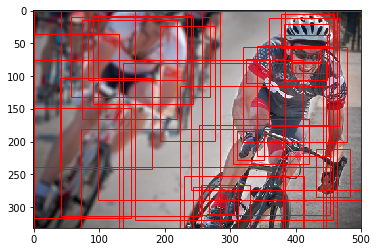


1it [00:06,  6.98s/it]

./data/flickr30k_train/7053160293.jpg


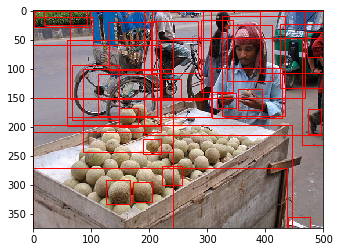


2it [00:07,  5.07s/it]

./data/flickr30k_train/3860415767.jpg


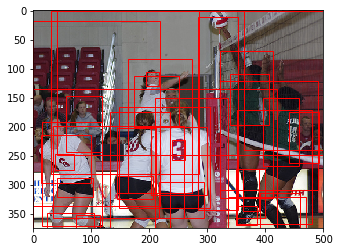


3it [00:08,  3.68s/it]

./data/flickr30k_train/6188752802.jpg


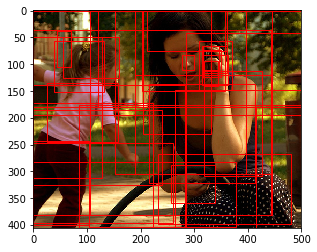


4it [00:08,  2.69s/it]

./data/flickr30k_test/201995559.jpg


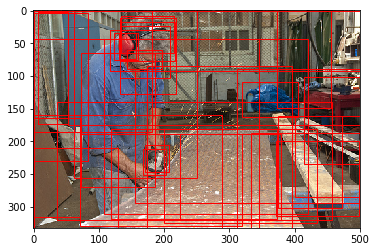


5it [00:08,  2.00s/it]

./data/flickr30k_train/5551993461.jpg


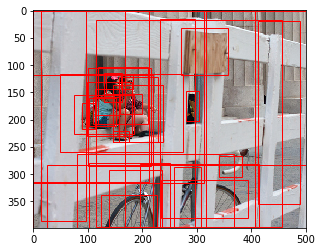


6it [00:09,  1.52s/it]

./data/flickr30k_train/4747450681.jpg


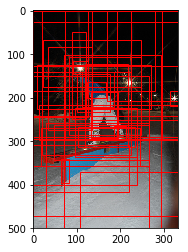


7it [00:14,  2.52s/it]

./data/flickr30k_train/3191805046.jpg


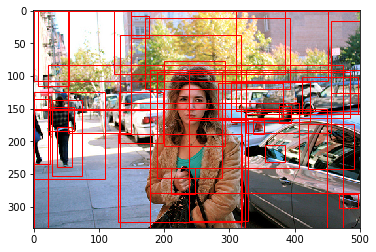


8it [00:14,  1.88s/it]

./data/flickr30k_train/4548216727.jpg


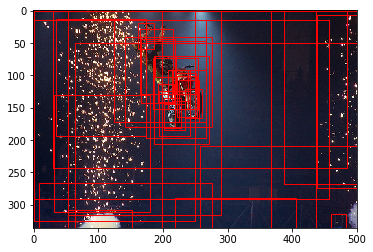


9it [00:14,  1.43s/it]

./data/flickr30k_train/3309578722.jpg


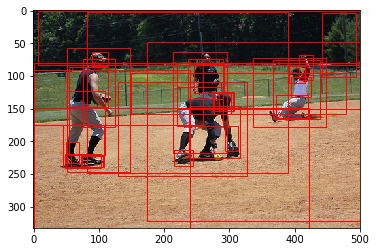


10it [00:15,  1.10s/it]

./data/flickr30k_train/7173223829.jpg


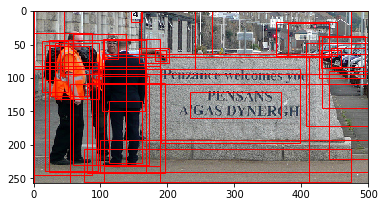


11it [00:15,  1.16it/s]

./data/flickr30k_test/1387461595.jpg


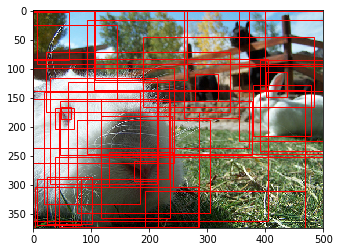


12it [00:15,  1.43it/s]

./data/flickr30k_test/294709836.jpg


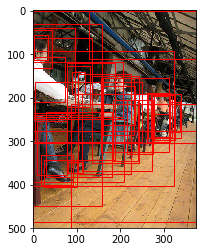


13it [00:16,  1.75it/s]

./data/flickr30k_train/4725077313.jpg


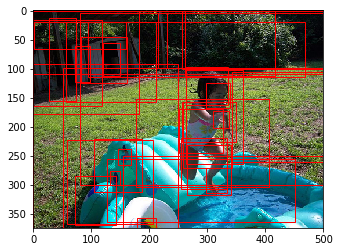


14it [00:16,  1.92it/s]

./data/flickr30k_test/562588230.jpg


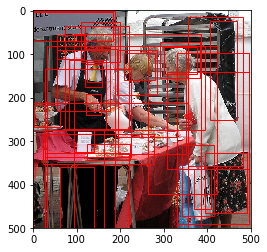


15it [00:16,  2.21it/s]

./data/flickr30k_train/4718146904.jpg


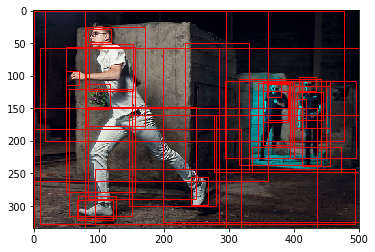


16it [00:17,  2.42it/s]

./data/flickr30k_train/3628043835.jpg


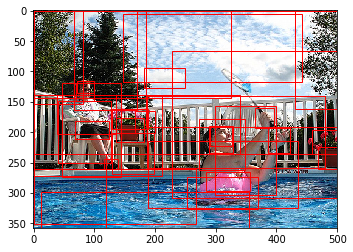


17it [00:17,  2.57it/s]

./data/flickr30k_train/3009018821.jpg


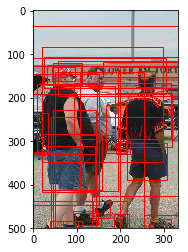


18it [00:17,  2.81it/s]

./data/flickr30k_test/499558360.jpg


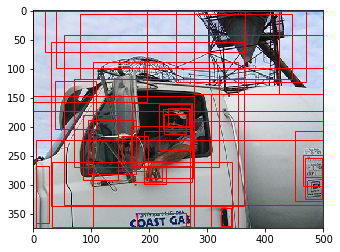


19it [00:18,  2.79it/s]

./data/flickr30k_train/4337871573.jpg


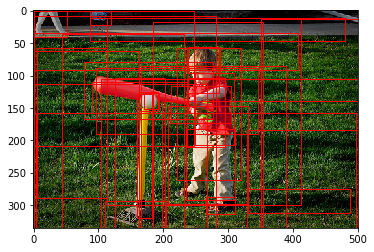


20it [00:18,  2.95it/s]

./data/flickr30k_train/4532807903.jpg


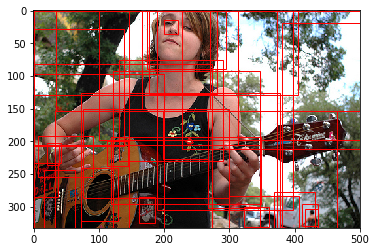


21it [00:18,  3.00it/s]

./data/flickr30k_train/2450468977.jpg


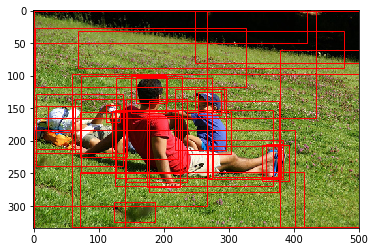


22it [00:18,  3.07it/s]

./data/flickr30k_test/757372682.jpg


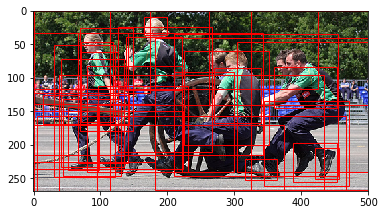


23it [00:19,  3.02it/s]

./data/flickr30k_train/3692836015.jpg


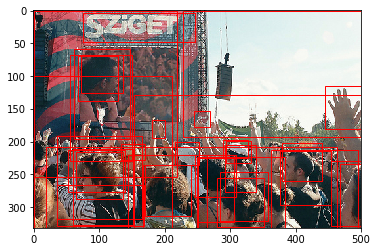


24it [00:19,  2.86it/s]

./data/flickr30k_train/6126962700.jpg


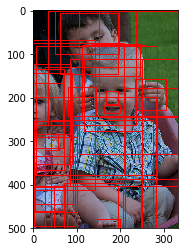


25it [00:20,  2.95it/s]

./data/flickr30k_train/3787061402.jpg


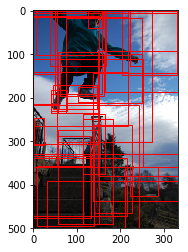


26it [00:20,  2.90it/s]

./data/flickr30k_train/3348811097.jpg


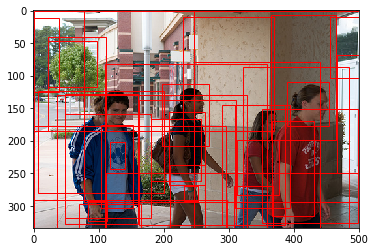


27it [00:20,  2.97it/s]

./data/flickr30k_train/2936969650.jpg


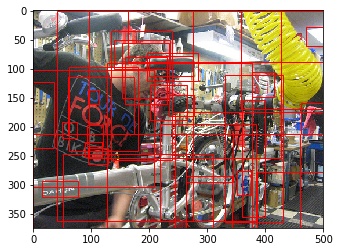


28it [00:21,  2.96it/s]

./data/flickr30k_train/2936881937.jpg


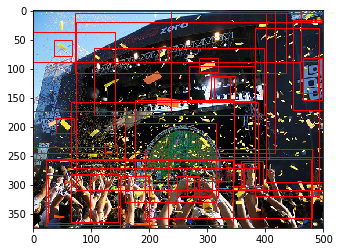


29it [00:21,  2.99it/s]

./data/flickr30k_train/5592562548.jpg


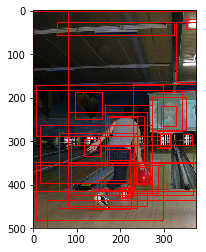


30it [00:21,  3.08it/s]

./data/flickr30k_train/3506454111.jpg


In [11]:
k=0
FIELDNAMES = ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features']
infile = './bottom-up_features/trainval_flickr30k/flickr-res.tsv.0'

with open(infile, "r+") as tsv_in_file:
    reader = csv.DictReader(tsv_in_file, delimiter='\t', fieldnames=FIELDNAMES)

    for item in tqdm(reader):
        k += 1
        if k>30:
            break

        item['num_boxes'] = int(item['num_boxes'])          
        image_id = int(item['image_id'])
        image_w = float(item['image_w'])
        image_h = float(item['image_h'])

        bboxes = np.frombuffer(
            base64.decodebytes(bytes(item['boxes'][2:-1], 'utf-8')),
            dtype=np.float32).reshape((item['num_boxes'], -1))

        box_width = bboxes[:, 2] - bboxes[:, 0]
        box_height = bboxes[:, 3] - bboxes[:, 1]
        scaled_width = box_width / image_w
        scaled_height = box_height / image_h
        scaled_x = bboxes[:, 0] / image_w
        scaled_y = bboxes[:, 1] / image_h

        box_width = box_width[..., np.newaxis]
        box_height = box_height[..., np.newaxis]
        scaled_width = scaled_width[..., np.newaxis]
        scaled_height = scaled_height[..., np.newaxis]
        scaled_x = scaled_x[..., np.newaxis]
        scaled_y = scaled_y[..., np.newaxis]

        spatial_features = np.concatenate(
            (scaled_x,
             scaled_y,
             scaled_x + scaled_width,
             scaled_y + scaled_height,
             scaled_width,
             scaled_height),
            axis=1)
        
        
        # Display the corresponding picture
        for img in data['images']:
            if img['imgid']==image_id:
                image_name=img['filename']
                
        path1='./data/flickr30k_train/'+image_name
        path2='./data/flickr30k_test/'+image_name
        
        
        try:  
            im = Image.open(path1)
            plt.imshow(im)
            
            # Add the boxes on the picture
            for i in range(item['num_boxes']):
                rect = patches.Rectangle((bboxes[i,0], bboxes[i, 1]),box_width[i],box_height[i],linewidth=1,edgecolor='r',facecolor='none')                # Add the patch to the Axes
                plt.axes().add_patch(rect)

            plt.show()

            print(path1)
        except:  
            im = Image.open(path2)
            plt.imshow(im)
            
            # Add the boxes on the picture
            for i in range(item['num_boxes']):
                rect = patches.Rectangle((bboxes[i,0], bboxes[i, 1]),box_width[i],box_height[i],linewidth=1,edgecolor='r',facecolor='none')                # Add the patch to the Axes
                plt.axes().add_patch(rect)
                
            plt.show()
            
            print(path2)